In [1]:

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from itertools import combinations_with_replacement
import functools


import assgn2 as asn



In [2]:

df = pd.read_csv('Dataset/winequality-red.csv',sep = ';')

In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


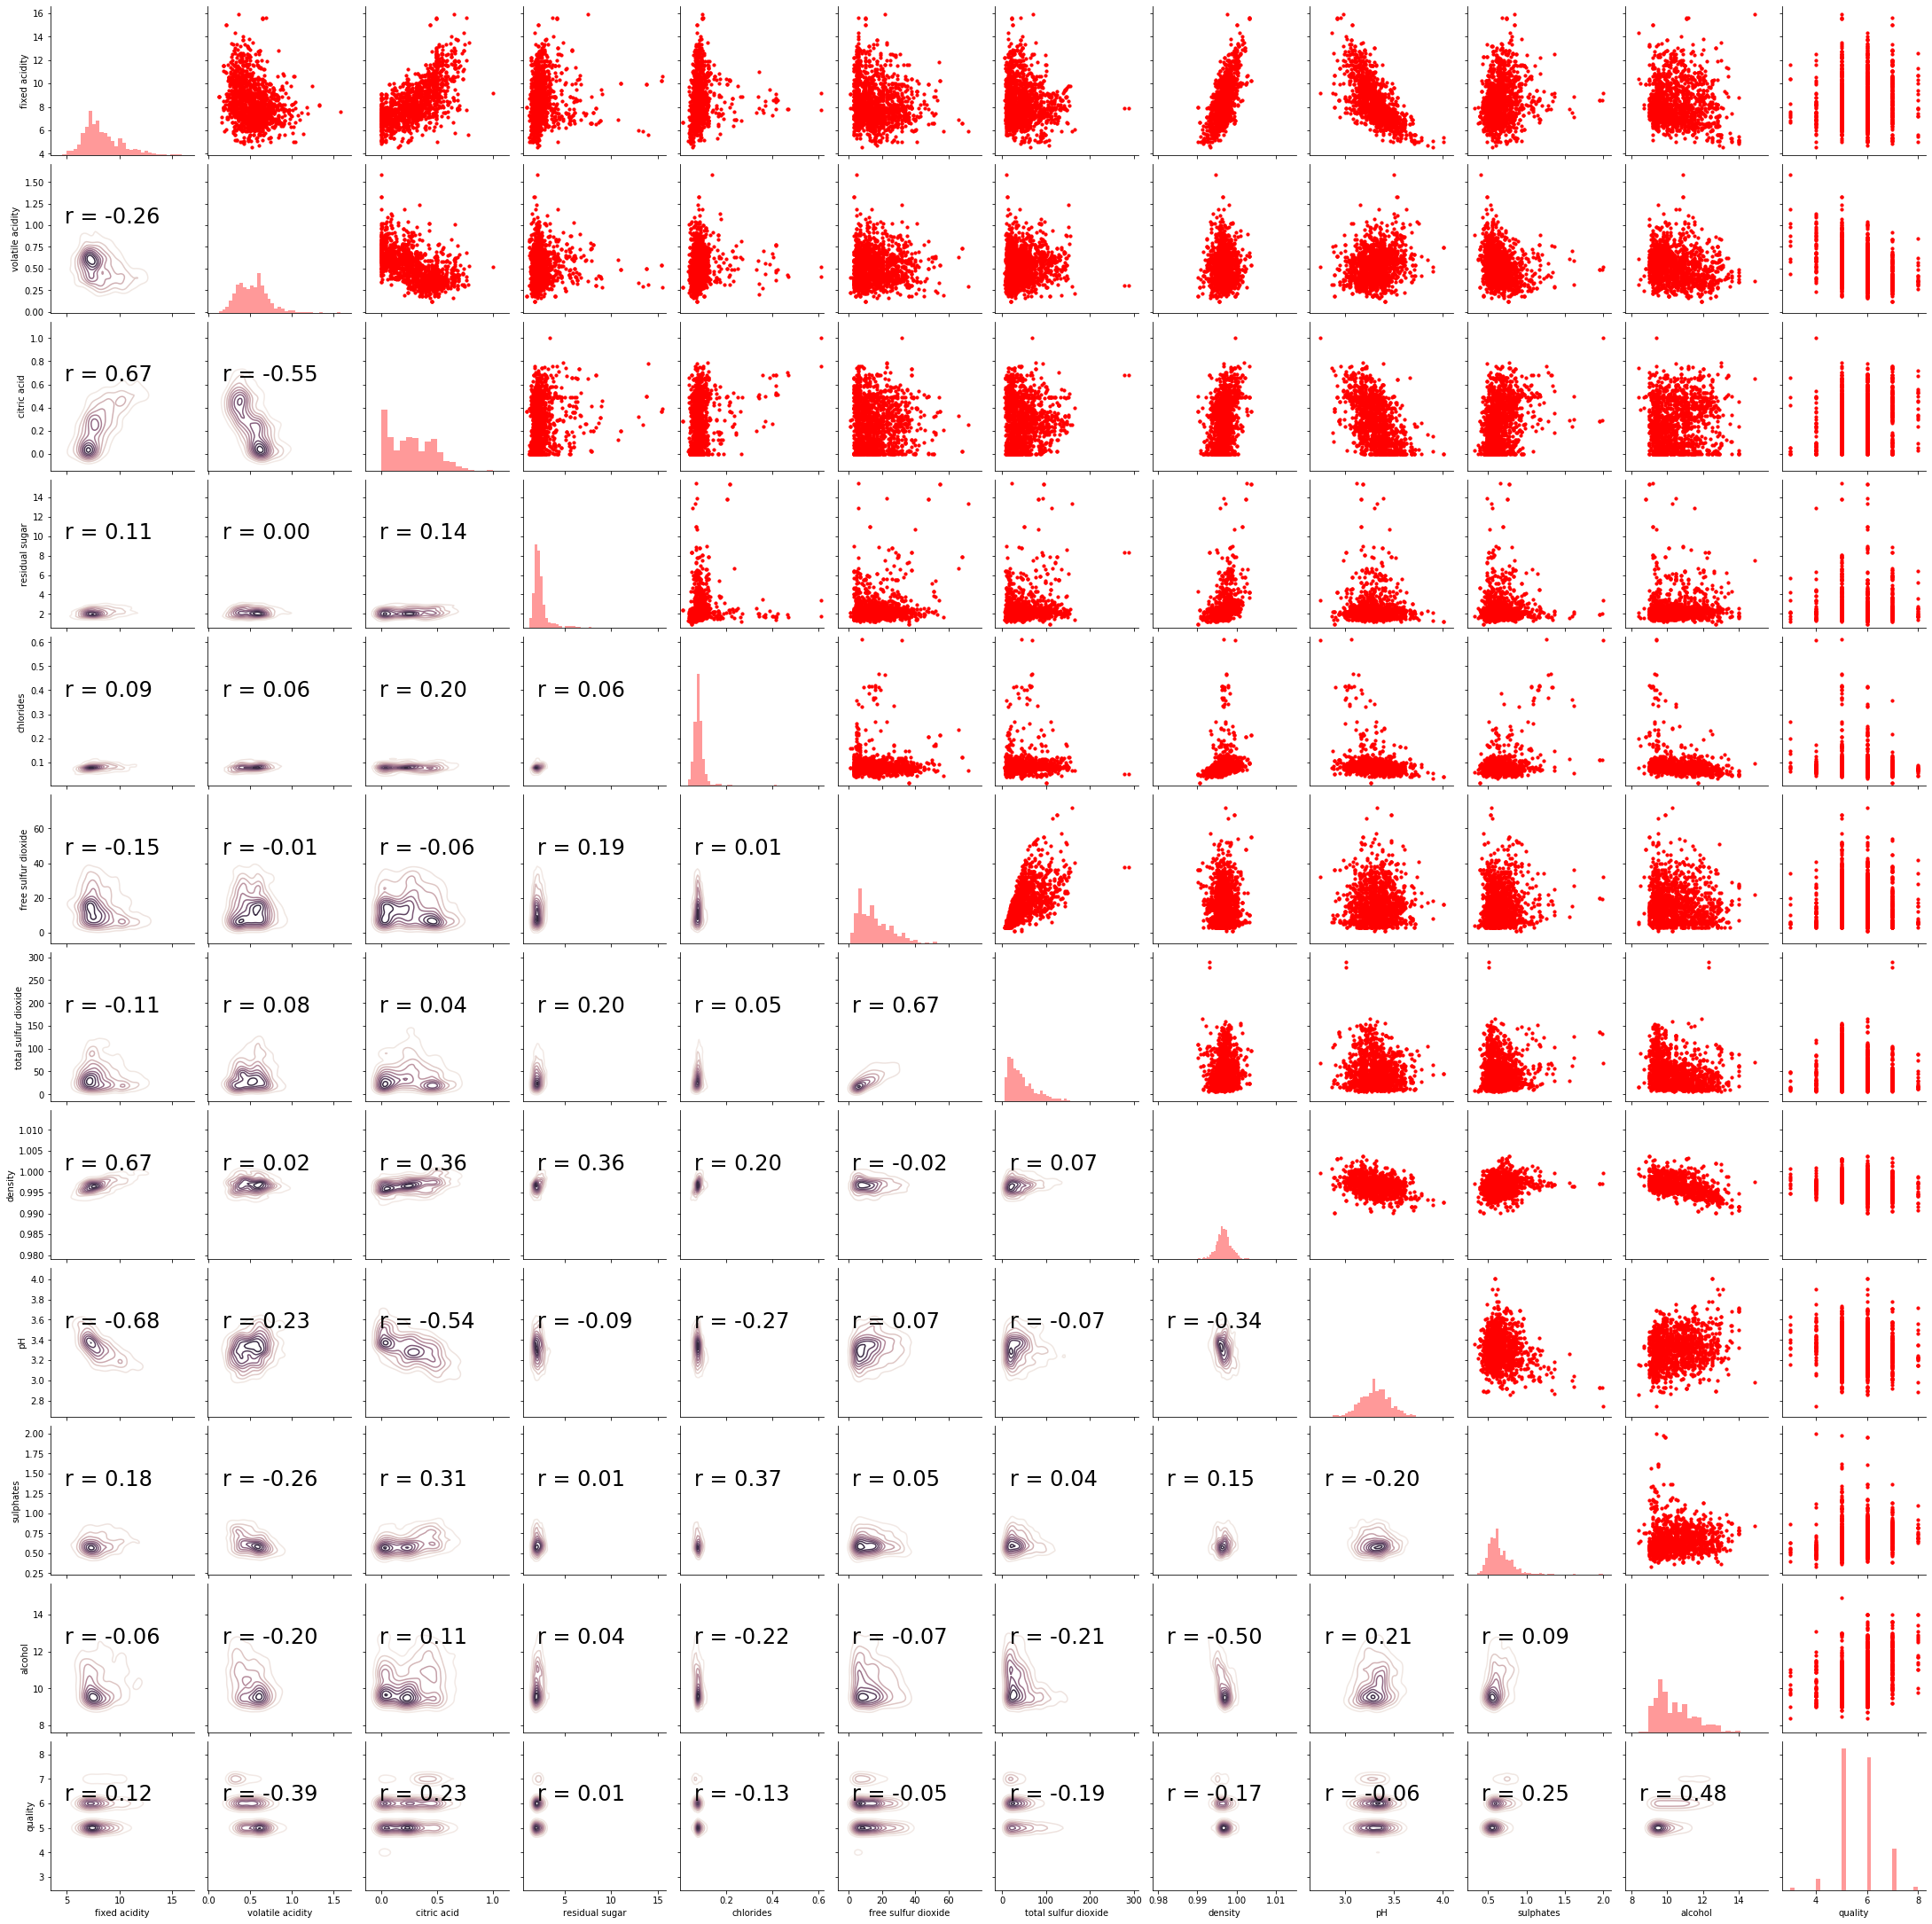

In [4]:

import warnings
warnings.filterwarnings('ignore')


# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy import stats

# Calculate correlation coefficient
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)
    
cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair grid set up
g = sns.PairGrid(df)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);


In [4]:
df = df.sample(frac=1) 

In [5]:
X = df.drop(columns = 'quality') #data matrix
y = df['quality']  #quality

X = np.array(X)  # to np array 
y = np.array(y)   # to np array

In [6]:
best_features = ['volatile acidity', 'density', 'pH', 'sulphates', 'alcohol']
best_df = df[best_features]
X = np.array(best_df)

In [7]:
def split_trainTest(X,y,t):
    train_size = int((1-t) * X.shape[0])   
    return X[:train_size],X[train_size:],y[:train_size],y[train_size:]

In [8]:
X_train, X_test, y_train, y_test = split_trainTest(X,y,t=0.2)

In [9]:
X_train = (X_train - np.mean(X_train))/np.std(X_train)
X_test = (X_test - np.mean(X_test))/np.std(X_test)

In [31]:
x_train = asn.polynomialFeatures(X_train,1)
x_test = asn.polynomialFeatures(X_test,1)
validation_accuracy = np.empty((4,6,2))
lambd= [1.0, 0,0.1,0.01, 0.001, 0.0001]
learning_rate = [0.1, 0.01, 0.001, 0.001]
regularizer= ['l1', 'l2']
minScore = 1e10
for i,lr in enumerate(learning_rate):
    for j,ld in enumerate(lambd):
        for x,rg in enumerate(regularizer):
            lnreg = asn.Linear_Regression()
            model_args = {'learning_rate' : lr,'lambd':ld,'regularizer' : rg,'epochs' : 1000, 'tol' : 1e-3}
            result = asn.sFold(5,x_train,y_train,lnreg,error_fuction = asn.mse,**model_args)
            validation_accuracy[i,j,x] = result['Average error']
            if validation_accuracy[i,j,x] < minScore:
                minScore = validation_accuracy[i,j,x]
                index = [i,j,x]
            
                
                

In [32]:

print(index)
a,b,c = index
print('optimal learning_rate: ',learning_rate[a])
print('optimal lambd: ',lambd[b])
print('optimal regularizer: ',regularizer[c])
print('optimal value',validation_accuracy[a,b,c])


[0, 1, 0]
optimal learning_rate:  0.1
optimal lambd:  0
optimal regularizer:  l1
optimal value 0.5299436642200533


In [33]:

validation_accuracy = np.empty((4,6,2))
lambd= [1.0, 0,0.1,0.01, 0.001, 0.0001]
learning_rate = [0.1, 0.01, 0.001, 0.001]
regularizer= ['l1', 'l2']
minScore = 1e10
for i,lr in enumerate(learning_rate):
    for j,ld in enumerate(lambd):
        for x,rg in enumerate(regularizer):
            lnreg = asn.SGD()
            model_args = {'learning_rate' : lr,'lambd':ld,'regularizer' : rg,'epochs' : 1000,'tol' : 1e-3}
            result = asn.sFold(5,x_train,y_train,lnreg,error_fuction = asn.mse,**model_args)
            validation_accuracy[i,j,x] = result['Average error']
            if validation_accuracy[i,j,x] < minScore:
                minScore = validation_accuracy[i,j,x]
                index = [i,j,x]

In [34]:

print(index)
a,b,c = index
print('optimal learning_rate: ',learning_rate[a])
print('optimal lambd: ',lambd[b])
print('optimal regularizer: ',regularizer[c])
print('optimal value',validation_accuracy[a,b,c])

[0, 1, 0]
optimal learning_rate:  0.1
optimal lambd:  0
optimal regularizer:  l1
optimal value 0.4704980592298731


In [35]:

linRg = asn.Linear_Regression()
linRg.fit(x_train,y_train,learning_rate=0.1,epochs=1000,regularizer='l1',lambd= 0., tol=1e-3)

y_test_predicted_sgd = linRg.predict(x_test)
print("Test: Mean squared error: %.2f"
      % asn.mse(y_test, y_test_predicted_sgd)) 

Test: Mean squared error: 0.47


In [36]:

linRg2 = asn.SGD()
linRg2.fit(x_train,y_train,learning_rate=0.1,epochs=1000,regularizer='l2',lambd= 0.001, tol=1e-3)

y_test_predicted_sgd = linRg2.predict(x_test)
print("Test: Mean squared error: %.2f"
      % asn.mse(y_test, y_test_predicted_sgd)) 

Test: Mean squared error: 0.43


In [10]:
cv = 5
train_size = 100  

In [42]:
# testing learning curve function
train_scores, val_scores, train_sizes,_ = asn.learning_curve(asn.Linear_Regression, x_train, y_train, cv, train_size = train_size, learning_rate = 0.1, 
               epochs = 1000, tol = 1e-5, regularizer = 'l1', lambd = 0)

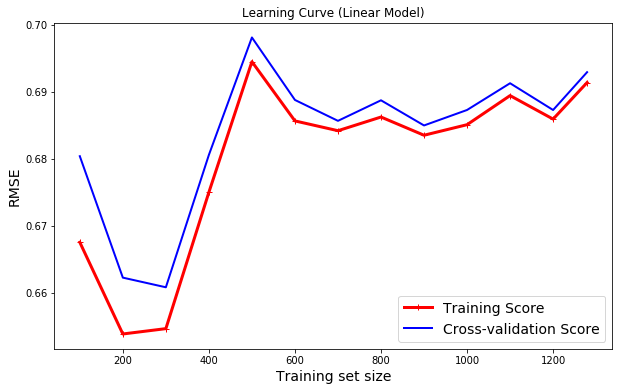

In [43]:
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores)
train_std = np.std(train_scores)

# Create means and standard deviations of validation set scores
val_mean = np.mean(val_scores)
val_std = np.std(val_scores)


plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores, "r-+", linewidth=3, label="Training Score")
plt.plot(train_sizes, val_scores, "b-", linewidth=2, label="Cross-validation Score")
plt.legend(loc="best", fontsize=14)   
plt.xlabel("Training set size", fontsize=14) 
plt.ylabel("RMSE", fontsize=14) 
plt.title("Learning Curve (Linear Model)")
plt.show()

In [10]:
x3_train = asn.polynomialFeatures(X_train,3)
x3_test = asn.polynomialFeatures(X_test,3)

In [57]:
model = asn.Linear_Regression()
model.fit(x3_train,y_train,learning_rate=0.01,epochs=1000,regularizer='l2',lambd= 15, tol=1e-3)

In [58]:

y_train_predicted_sgd = model.predict(x3_train)
print(y_train_predicted_sgd)
y_test_predicted_sgd = model.predict(x3_test)
print("Training: Mean squared error: %.2f"
      % asn.mse(y_train, y_train_predicted_sgd))

print("Test: Mean squared error: %.2f"
      % asn.mse(y_test, y_test_predicted_sgd))

[4.86748926 5.94651793 6.19966977 ... 5.94782877 6.4792574  5.24648358]
Training: Mean squared error: 0.56
Test: Mean squared error: 0.44


In [15]:
# testing learning curve function
train_scores3, val_scores3, train_sizes3,_ = asn.learning_curve(asn.Linear_Regression, x3_train, y_train, cv, train_size = train_size, learning_rate = 0.01, 
               epochs = 1000, tol = 1e-3, regularizer = 'l2', lambd = 0.1)

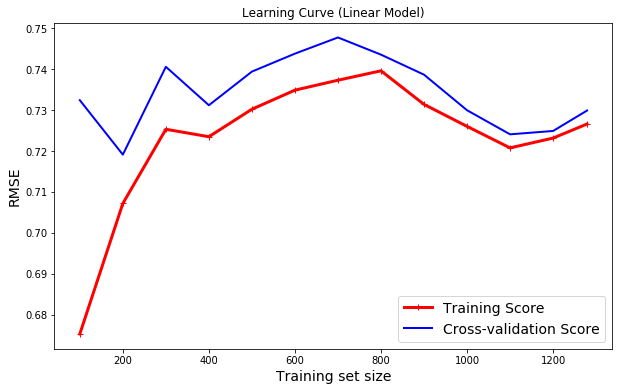

In [16]:
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores3)
train_std = np.std(train_scores3)

# Create means and standard deviations of validation set scores
val_mean = np.mean(val_scores3)
val_std = np.std(val_scores3)


plt.figure(figsize=(10, 6))
plt.plot(train_sizes3, train_scores3, "r-+", linewidth=3, label="Training Score")
plt.plot(train_sizes3, val_scores3, "b-", linewidth=2, label="Cross-validation Score")
plt.legend(loc="best", fontsize=14)   
plt.xlabel("Training set size", fontsize=14) 
plt.ylabel("RMSE", fontsize=14) 
plt.title("Learning Curve (Linear Model)")
plt.show()

X shape = (1279, 6) #### learning_rate = 0.1   ##### Degree = 1 ## epoch:1000
X shape = (1279, 21) #### learning_rate = 0.010000000000000002   ##### Degree = 2 ## epoch:1000
X shape = (1279, 56) #### learning_rate = 0.0010000000000000002   ##### Degree = 3 ## epoch:1000
X shape = (1279, 126) #### learning_rate = 0.00010000000000000003   ##### Degree = 4 ## epoch:1000
X shape = (1279, 252) #### learning_rate = 1.0000000000000004e-05   ##### Degree = 5 ## epoch:1000


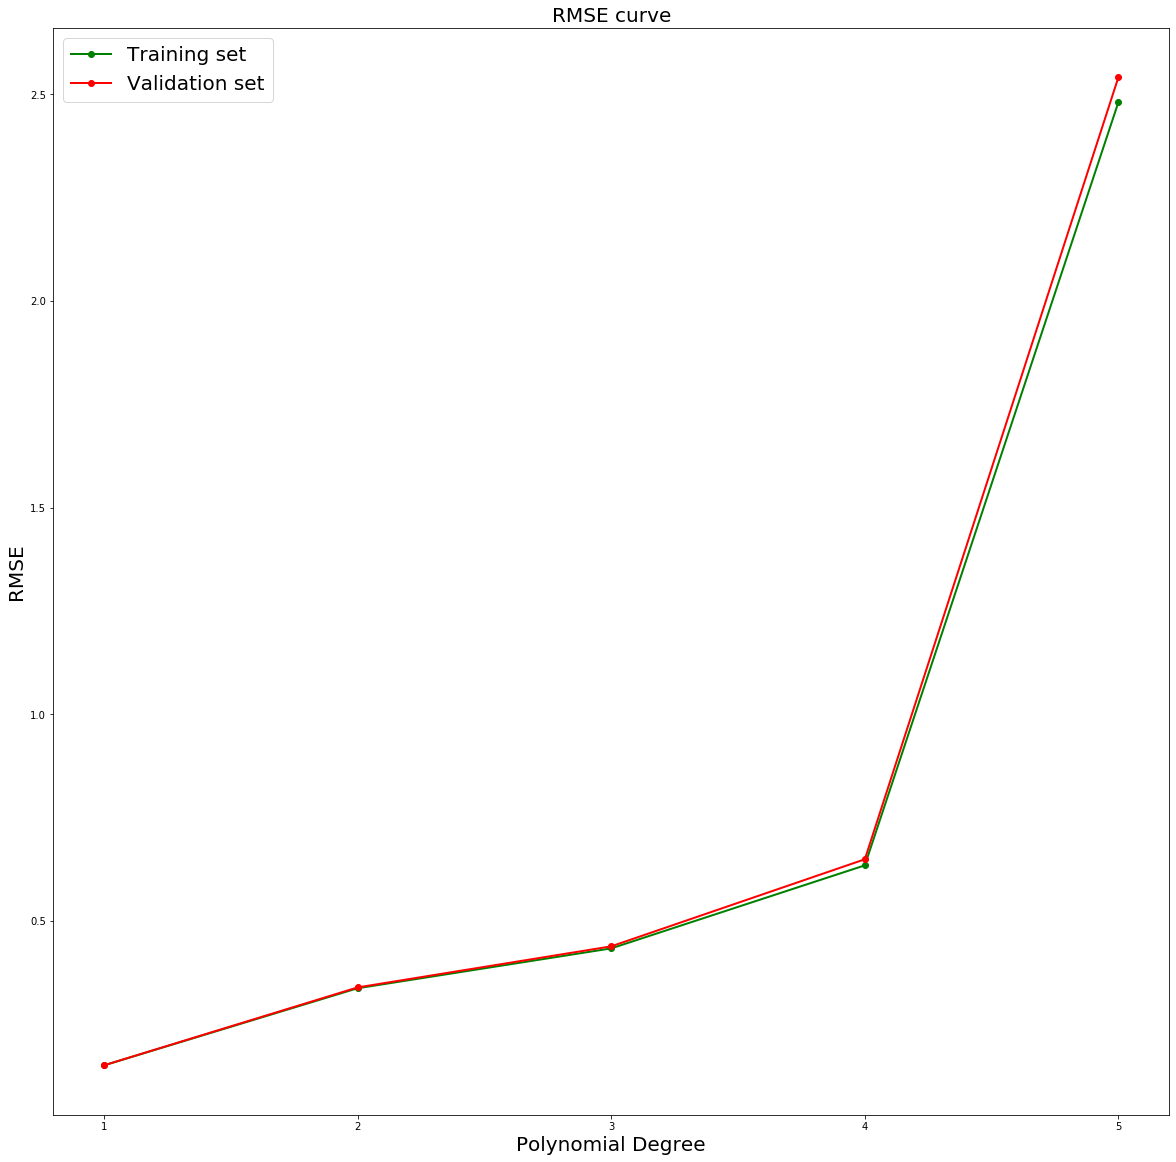

In [11]:
maxPolynomialDegree = 5
asn.plot_polynomial_model_complexity(asn.Linear_Regression, X_train, y_train, cv, maxPolynomialDegree, 
                                     learning_rate=0.1, epochs=1000, tol=1e-3, regularizer=None, lambd=0)

In [11]:
x_train = asn.polynomialFeatures(X_train,1)
x_test = asn.polynomialFeatures(X_test,1)
linRg = asn.Linear_Regression()
linRg.fit(x_train,y_train,learning_rate=0.1,epochs=1000,regularizer='l1',lambd= 0., tol=1e-3)

y_test_predicted_sgd = linRg.predict(x_test)
print("Test: Mean squared error: %.2f"
      % asn.mse(y_test, y_test_predicted_sgd)) 

Test: Mean squared error: 0.47


In [12]:
linRg.theta

array([ 0.95121206, -0.67357597, -0.54851636,  0.02685358, -0.62675035,
        1.81460805])

In [13]:
linRg2 = asn.Linear_Regression()
linRg2.fit(x_train,y_train,learning_rate=0.01,epochs=1000,regularizer='l1',lambd= 0., tol=1e-3)

y_test_predicted_sgd = linRg2.predict(x_test)
print("Test: Mean squared error: %.2f"
      % asn.mse(y_test, y_test_predicted_sgd))

Test: Mean squared error: 0.47


In [14]:
linRg2.theta

array([ 0.93818907, -0.66426565, -0.54100737,  0.02656025, -0.61825383,
        1.7901889 ])

In [12]:
x_train = asn.polynomialFeatures(X_train,1)
x_test = asn.polynomialFeatures(X_test,1)

In [13]:

linRg3 = asn.SGD()
linRg3.fit(x_train,y_train,learning_rate=0.1,epochs=1000,regularizer='l2',lambd= 0.001, tol=1e-3)

y_test_predicted_sgd = linRg3.predict(x_test)
print("Test: Mean squared error: %.2f"
      % asn.mse(y_test, y_test_predicted_sgd)) 

Test: Mean squared error: 0.49


In [14]:
linRg3.theta

array([ 1.92691676, -3.40787797, -1.1089653 , -2.09115968,  2.12356365,
        1.08844715])

In [19]:

linRg5 = asn.SGD()
linRg5.fit(x_train,y_train,learning_rate=0.01,epochs=1000,regularizer='l2',lambd= 0.001, tol=1e-3)

y_test_predicted_sgd = linRg5.predict(x_test)
print("Test: Mean squared error: %.2f"
      % asn.mse(y_test, y_test_predicted_sgd)) 

Test: Mean squared error: 0.50


In [20]:
linRg5.theta

array([ 0.95131711, -0.66477099, -0.54834406,  0.0103621 , -0.62161515,
        1.77468226])

In [15]:

linRg4 = asn.SGD()
linRg4.fit(x_train,y_train,learning_rate=0.001,epochs=1000,regularizer='l2',lambd= 0.001, tol=1e-3)

y_test_predicted_sgd = linRg4.predict(x_test)
print("Test: Mean squared error: %.2f"
      % asn.mse(y_test, y_test_predicted_sgd)) 

Test: Mean squared error: 0.50


In [16]:
linRg4.theta

array([ 0.94481433, -0.660064  , -0.54483858,  0.0198539 , -0.62839141,
        1.77718129])